C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Name : Arunjuthan.M.A
Reg No : 212225230020

MSE : 0.21
MAE : 0.32
R_2 : 0.8279

Model Coefficients :
Coefficients :  [ 0.03575487  0.11125544  0.00974398  0.17813822  0.02061979  0.16155255
  0.30575965 -0.02575697 -0.08548059  0.00160681  0.10783132  0.04111844
 -0.04104118 -0.05391548 -0.02043156  0.02230188  0.01806052 -0.00760046
 -0.08649186 -0.01318899 -0.09247052 -0.03596314  0.06157426  0.2075788
  0.01165796 -0.10320995  0.06618981 -0.01603684 -0.00163864  0.01083579
 -0.03873855 -0.15174121 -0.0780053   0.0007264  -0.0261123   0.01083579
 -0.00572168 -0.0158524   0.02043156 -0.01776284 -0.03185751 -0.04100974
 -0.01544585]
Intercept :  [-0.01037367]


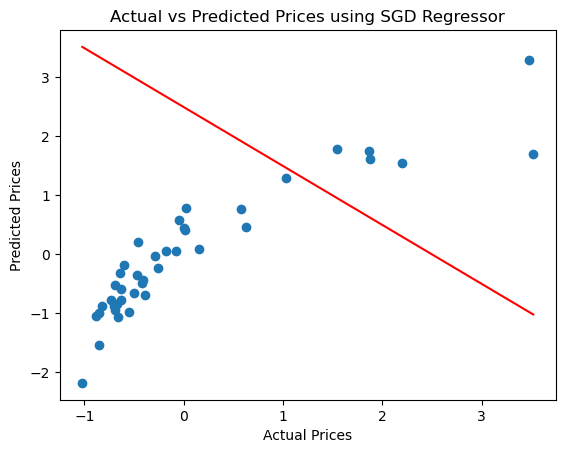

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data= pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())

data = data.drop(['CarName','car_ID'],axis=1)
data=pd.get_dummies(data,drop_first = True)

x=data.drop('price',axis=1)
y=data['price']

scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(np.array(y).reshape(-1,1))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

sgd_model = SGDRegressor(max_iter=1000 , tol=1e-3)

sgd_model.fit(x_train,y_train)

y_pred=sgd_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

print("\nName : Arunjuthan.M.A")
print("Reg No : 212225230020\n")
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R_2 : {r2:.4f}")

print("\nModel Coefficients :")
print("Coefficients : ",sgd_model.coef_)
print("Intercept : ",sgd_model.intercept_)

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test),max(y_test)],[max(y_test),min(y_test)],color='red')
plt.show()
